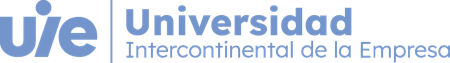

**G25GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2025-26

# Preprocesamiento extra para el modelo de regresión

In [1]:
# Importamos las librerías necesarias
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
input_data_file = "proy_supermercado_dev_preprocesado_base.csv"
output_data_file = "proy_supermercado_dev_preprocesado_regresion.csv"

In [3]:
datos = pd.read_csv(input_data_file)

display(datos)

,educacion,ingresos,hijos_casa,adolescentes_casa,recencia,gasto_vinos,gasto_frutas,gasto_carnes,gasto_pescado,gasto_dulces,...,intensidad_compra,campanas_totales,estado_civil_Alone,estado_civil_Desconocido,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,estado_civil_Together,estado_civil_Widow,estado_civil_YOLO
0,3.0,53359.0,1.0,1.0,4.0,173.0,4.0,30.0,3.0,6.0,...,2.000000,0,0,0,0,1,0,0,0,0
1,3.0,21474.0,1.0,0.0,0.0,6.0,16.0,24.0,11.0,0.0,...,6.000000,1,0,0,0,0,1,0,0,0
2,3.0,41411.0,0.0,0.0,11.0,37.0,32.0,38.0,11.0,3.0,...,0.583333,0,0,0,1,0,0,0,0,0
3,5.0,64504.0,1.0,2.0,81.0,986.0,36.0,168.0,16.0,0.0,...,0.219512,0,0,0,0,0,0,1,0,0
4,3.0,65169.0,0.0,0.0,23.0,1074.0,0.0,69.0,0.0,0.0,...,1.125000,4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,3.0,19419.0,1.0,0.0,76.0,2.0,14.0,28.0,16.0,3.0,...,0.090909,0,0,0,0,1,0,0,0,0
1813,3.0,43602.0,1.0,1.0,45.0,19.0,5.0,12.0,10.0,3.0,...,0.130435,0,0,0,0,0,1,0,0,0
1814,3.0,24639.0,1.0,1.0,3.0,20.0,3.0,16.0,0.0,4.0,...,1.500000,0,0,0,0,1,0,0,0,0
1815,3.0,90000.0,0.0,0.0,91.0,675.0,144.0,133.0,94.0,192.0,...,0.184783,3,0,0,0,1,0,0,0,0


In [4]:

datos['ingresos_sq'] = datos['ingresos'] ** 2  # Cuadrática
datos['total_compras_sq'] = datos['total_compras'] ** 2

# Ratios adicionales
datos['ingresos_per_capita'] = datos['ingresos'] / (datos['hijos_casa'] + datos['adolescentes_casa'] + 1)
datos['gasto_por_ingreso_estimado'] = datos['totalcompras_x_ingresos'] / (datos['ingresos'] + 1)

# Interacción entre compras online/offline
datos['compras_web_x_catalogo'] = datos['num_compras_web'] * datos['num_compras_catalogo']

# Raíz cuadrada (captura crecimientos decrecientes)
datos['ingresos_sqrt'] = np.sqrt(datos['ingresos'])
datos['total_compras_sqrt'] = np.sqrt(datos['total_compras'])

datos['ingresos_x_num_catalogo'] = datos['ingresos'] * datos['num_compras_catalogo']
datos['total_compras_x_catalogo'] = datos['total_compras'] * datos['num_compras_catalogo']

In [5]:
# Eliminamos componentes y derivadas de gasto_total
columnas_eliminar = [
    # SOLO componentes directos y derivadas matemáticas de gasto_total
    'gasto_vinos', 'gasto_frutas', 'gasto_carnes', 
    'gasto_pescado', 'gasto_dulces', 'gasto_oro', 
    'porcentaje_gasto_vinos',
    'porcentaje_gasto_frutas', 
    'porcentaje_gasto_carnes',
    'porcentaje_gasto_pescado',
    'porcentaje_gasto_dulces',
    'porcentaje_gasto_oro',
    'ticket_medio',
    'respuesta'  # Variable de clasificación
]

# Eliminamos solo las columnas que existan
columnas_a_eliminar = [col for col in columnas_eliminar if col in datos.columns]
datos_regresion = datos.drop(columns=columnas_a_eliminar)
display(datos_regresion)

,educacion,ingresos,hijos_casa,adolescentes_casa,recencia,num_compras_oferta,num_compras_web,num_compras_catalogo,num_compras_tienda,num_visitas_web_mes,...,estado_civil_YOLO,ingresos_sq,total_compras_sq,ingresos_per_capita,gasto_por_ingreso_estimado,compras_web_x_catalogo,ingresos_sqrt,total_compras_sqrt,ingresos_x_num_catalogo,total_compras_x_catalogo
0,3.0,53359.0,1.0,1.0,4.0,4.0,5.0,1.0,4.0,7.0,...,0,2.847183e+09,100.0,17786.333333,9.999813,5.0,230.995671,3.162278,53359.0,10.0
1,3.0,21474.0,1.0,0.0,0.0,2.0,3.0,1.0,2.0,7.0,...,0,4.611327e+08,36.0,10737.000000,5.999721,3.0,146.540097,2.449490,21474.0,6.0
2,3.0,41411.0,0.0,0.0,11.0,1.0,2.0,1.0,4.0,6.0,...,0,1.714871e+09,49.0,41411.000000,6.999831,2.0,203.496929,2.645751,41411.0,7.0
3,5.0,64504.0,1.0,2.0,81.0,7.0,11.0,3.0,4.0,7.0,...,0,4.160766e+09,324.0,16126.000000,17.999721,33.0,253.976377,4.242641,193512.0,54.0
4,3.0,65169.0,0.0,0.0,23.0,1.0,10.0,4.0,13.0,6.0,...,0,4.246999e+09,729.0,65169.000000,26.999586,40.0,255.282197,5.196152,260676.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,3.0,19419.0,1.0,0.0,76.0,4.0,4.0,0.0,3.0,9.0,...,0,3.770976e+08,49.0,9709.500000,6.999640,0.0,139.352072,2.645751,0.0,0.0
1813,3.0,43602.0,1.0,1.0,45.0,3.0,3.0,1.0,2.0,6.0,...,0,1.901134e+09,36.0,14534.000000,5.999862,3.0,208.810919,2.449490,43602.0,6.0
1814,3.0,24639.0,1.0,1.0,3.0,3.0,2.0,0.0,4.0,6.0,...,0,6.070803e+08,36.0,8213.000000,5.999756,0.0,156.968150,2.449490,0.0,0.0
1815,3.0,90000.0,0.0,0.0,91.0,1.0,4.0,8.0,5.0,1.0,...,0,8.100000e+09,289.0,90000.000000,16.999811,32.0,300.000000,4.123106,720000.0,136.0


In [6]:
# Partimos los datos en train y test
target_col= "gasto_total"
feature_cols = [col for col in datos_regresion.columns if col != target_col]

In [7]:
X=datos_regresion[feature_cols].copy()
y=(datos_regresion[target_col])

In [8]:
print("CORRELACIONES DE VARIABLES CON Total_Gasto:\n")
correlaciones = X.corrwith(y).abs().sort_values(ascending=False)

for i, (variable, corr) in enumerate(correlaciones.head(20).items(), 1):
    signo = "+" if X[variable].corr(y) > 0 else "-"
    print(f"{i:2d}. {variable:35s}: {signo}{corr:.4f}")

CORRELACIONES DE VARIABLES CON Total_Gasto:

 1. totalcompras_x_ingresos            : +0.8711
 2. ingresos_sq                        : +0.8410
 3. compras_per_capita                 : +0.8294
 4. gasto_por_ingreso_estimado         : +0.8206
 5. total_compras                      : +0.8206
 6. ingresos_x_num_catalogo            : +0.8205
 7. ingresos                           : +0.8172
 8. total_compras_sqrt                 : +0.8137
 9. ingresos_per_capita                : +0.8037
10. num_compras_catalogo               : +0.7936
11. total_compras_sq                   : +0.7823
12. ingresos_sqrt                      : +0.7754
13. total_compras_x_catalogo           : +0.7535
14. compras_web_x_catalogo             : +0.7318
15. ingresos_x_edad                    : +0.7039
16. num_compras_tienda                 : +0.6812
17. hijos_casa                         : -0.5649
18. num_compras_web                    : +0.5251
19. num_visitas_web_mes                : -0.4942
20. pct_hist_oro        

In [9]:
top_10_vars = [
    'totalcompras_x_ingresos',      # +0.8711 LA MEJOR
    
    # === VARIABLES BASE (necesarias) ===
    'total_compras',                 # +0.8206 (base lineal)
    'ingresos',                      # +0.8172 (base lineal)
    
    # === NO-LINEALIDAD (solo las mejores) ===
    'ingresos_sq',                   # +0.8410 (cuadrática)
    'total_compras_sqrt',            # +0.8137 (raíz - diferente)
    
    # === COMPORTAMIENTO ESPECÍFICO (diverso) ===
    'num_compras_catalogo',          # +0.7936 (canal)
    'num_compras_tienda',            # +0.6812 (canal físico)
    'compras_per_capita',            # +0.8294 (ratio familiar)
    
    # === NEGATIVAS (balance) ===
    'hijos_casa',                    # -0.5649
    'num_visitas_web_mes'            # -0.4942
]

In [10]:
top_12_vars = [
    'totalcompras_x_ingresos',
    'ingresos_sq',
    'compras_per_capita',
    'total_compras',
    'num_compras_catalogo',
    'num_compras_tienda',
    'compras_web_x_catalogo',
    'ingresos_per_capita',
    'ingresos',
    'hijos_casa',
    'num_compras_web',
    'num_visitas_web_mes'
]

In [11]:
# Nos quedamos con las 15 variables más correlacionadas
top_15_vars = [# Variables originales fuertes (sin redundancia)
    'totalcompras_x_ingresos',     # +0.8711 (interacción ya existente)
    'total_compras',                # +0.8206
    'ingresos',                     # +0.8172
    
    # SOLO 1 transformación cuadrática (la mejor)
    'ingresos_sq',                  # +0.8410 (añadir no-linealidad)
    
    # Variables de comportamiento
    'num_compras_catalogo',         # +0.7936
    'num_compras_tienda',           # +0.6812
    'num_compras_web',              # +0.5251
    
    # Variables demográficas (importantes aunque negativas)
    'hijos_casa',                   # -0.5649
    'ingresos_x_edad',              # +0.7039
    
    # Interacción de canales (NO basada en ingresos)
    'compras_web_x_catalogo',       # +0.7318
    
    # Variables de engagement
    'num_visitas_web_mes',          # -0.4942
    'campanas_totales',             # +0.3890
    'acepta_cmp5',                  # +0.4025
    
    # Ratios adicionales (solo 1)
    'compras_per_capita',           # +0.8294
    
    # Variable histórica
    'pct_hist_oro'                  # -0.4366
]

In [12]:
# Guardamos el nuevo dataset con las variables seleccionadas
variables_a_guardar = top_15_vars + [target_col]
datos_regresion_final = datos[variables_a_guardar]

In [13]:
datos_regresion_final.to_csv(output_data_file, index=False)